In [1]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

MICRO_METRICS_DIR = "/home/nivek/Downloads/"
files_results_vanilla = ["vanilla0.csv", "vanilla1.csv", "vanilla50.csv", "vanilla500.csv"]
files_results_direct = ["direct0.csv", "direct1.csv", "direct50.csv", "direct500.csv", "direct1000.csv"]
file_time_result_van = "time_van.csv"
file_time_result_dir = "time.csv"
file_time_result_loc = "time_loc.csv"



dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750'])
dict_values([10241.75, 12491.4, 12852.75, 15302.6, 16810.0, 18531.4, 20102.4, 21598.8, 26936.8, 36549.4])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750'])
dict_values([10805.2, 12467.2, 13817.2, 15067.4, 16781.0, 18342.4, 20847.833333333332, 21748.8, 26632.8, 36096.0])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([10185.75, 11014.0, 11168.6, 11073.0, 11149.4, 11325.8, 11365.2, 11485.0, 12148.4, 13978.6, 17385.6])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([11036.6, 11570.5, 11560.333333333334, 11246.8, 11188.0, 11454.6, 11499.0, 11643.6, 12332.4, 14359.0, 17755.6])


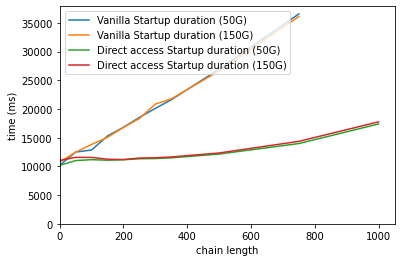

In [3]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import pprint
pp = pprint.PrettyPrinter(indent=4)

RESULTS_PATH="/home/nivek/Documents/results_expes"
VANILLA_FILE_PATH=RESULTS_PATH+"/startup/vanilla/time_van_ms"
DIRECT_FILE_PATH=RESULTS_PATH+"/startup/direct_hack/time_dh_ms"

def data_per_disk_from_file(file_path):
    data_per_disk = {}

    with open(file_path, 'r') as datafile:
        lines = datafile.readlines()
        i=0
        snap_nb = -1
        disk_size = -1
        while True:
            unpack_obj = parse.parse("****Snapshots : {} - Disk : {}****\n", lines[i])
            ms = -1
            if unpack_obj != None:
                [snap_nb, disk_size] = unpack_obj
            else:
                unpack_obj = parse.parse("{:d}\n", lines[i])
                if unpack_obj == None: break
                [ms] = unpack_obj

            if disk_size not in data_per_disk.keys():
                data_per_disk[disk_size] = {}

            if snap_nb not in data_per_disk[disk_size].keys():
                data_per_disk[disk_size][snap_nb] = []

            data_per_disk[disk_size][snap_nb] += [ms]


            i += 1
            if i == len(lines):
                break
    return data_per_disk

data_per_disk_vanilla = data_per_disk_from_file(VANILLA_FILE_PATH)
data_per_disk_dh = dpddh= data_per_disk_from_file(DIRECT_FILE_PATH)


for k in data_per_disk_vanilla.keys():
    for kk in data_per_disk_vanilla[k].keys():
        data_per_disk_vanilla[k][kk] = sum(data_per_disk_vanilla[k][kk])/len(data_per_disk_vanilla[k][kk])
    dic = data_per_disk_vanilla[k]
    pp.pprint(dic.keys())
    pp.pprint(dic.values())
    plt.plot([int(a) for a in dic.keys()], dic.values(), label="Vanilla Startup duration ("+k+")")
    
for k in dpddh.keys():
    for kk in dpddh[k].keys():
        dpddh[k][kk] = sum(dpddh[k][kk])/len(dpddh[k][kk])
    dic = dpddh[k]
    pp.pprint(dic.keys())
    pp.pprint(dic.values())
    plt.plot([int(a) for a in dic.keys()], dic.values(), label="Direct access Startup duration ("+k+")")

plt.xlabel("chain length")
plt.ylabel("time (ms)")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.legend()    
plt.show()

[100.0, 57.31335146240434, 2.261388620263231, 0.23264473393482465] [0.0, 42.68664853759566, 97.73861137973677, 99.76735526606518] [0.05786266874200772, 0.04416429116312683, 0.07925920551018928, 0.015133897945846487] [99.942137331258, 99.95583570883687, 99.92074079448982, 99.98486610205416] === df


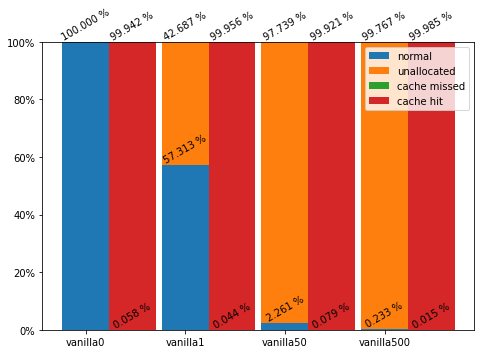

------------------------------------
[100.0, 57.45118875900688, 50.38945738423448, 50.36828033383017, 50.29917065898597] [0.0, 42.54881124099312, 49.61054261576552, 49.63171966616983, 49.70082934101403] [0.05768709366653399, 0.04587670717458892, 0.13983347104811542, 0.3076958077157141, 0.4114007461733481] [99.94231290633347, 99.95412329282541, 99.86016652895188, 99.69230419228428, 99.58859925382666] === df


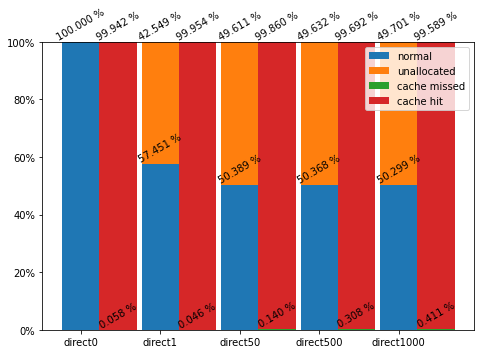

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

MICRO_METRICS_DIR = "/home/nivek/Downloads/"
files_results_vanilla = ["vanilla0.csv", "vanilla1.csv", "vanilla50.csv", "vanilla500.csv"]
files_results_direct = ["direct0.csv", "direct1.csv", "direct50.csv", "direct500.csv", "direct1000.csv"]

def get_data(files):
    n = []
    u = []
    cm = []
    cr = []
    cols = []
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

#         with open(CSV_FILE, 'r') as datafile :
#             csvreader = csv.reader(datafile, delimiter=';', quotechar='|')
#             for row in csvreader:
#                 datas += [row]
#         df = pd.DataFrame(datas, columns=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
    #     #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
#         datan = df[df.event == "NORMAL"].groupby(["snapshot_id", "offset"])["offset"].agg(np.size).groupby('snapshot_id').agg(np.size).to_dict()
#         print(datan)
#         datau = []
#         if len(df[df.event == "UNALLOCATED"]) > 0:
#             datau = df[df.event == "UNALLOCATED"].groupby(["snapshot_id", "offset"])["offset"].agg(np.size).groupby('snapshot_id').agg(np.size).to_dict()
#         print(datau)
        nn = len(df[df.event == "NORMAL"])
        uu = len(df[df.event == "UNALLOCATED"])
        cmm = len(df[df.event == "CACHE_MISSED"]) 
        crr = len(df[df.event == "CACHE_REQ"])
        n += [100*nn/(nn+uu)]
        u += [100*uu/(nn+uu)]
        cm += [100*cmm/crr]
        cr += [100*(crr-cmm)/crr]

        del datas
        del temp
        del df
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X = np.arange(len(cols))
    ax.bar(X+0.0, n, width=0.47)
    ax.bar(X+0.0, u, width=0.47, bottom=n)
    ax.bar(X+0.47, cm, width=0.47)
    ax.bar(X+0.47, cr, width=0.47, bottom=cm)
    ax.legend(labels=["normal", "unallocated", "cache missed", "cache hit"])
    print(n, u, cm, cr, "=== df")
    ax.set_xticks(X)
    ax.set_xticklabels(cols)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(100))
    
    rects = ax.patches
    
    # Make some labels.
    tt = n + u + cm + cr
    for i, rect in enumerate(rects):
        label = tt[i]
        label = "{:.3f} %".format(label) if label > 0 else ""
        height = rect.get_height()
        
        ax.text(
            rect.get_x() + rect.get_width()/2., rect.get_y() + height, label, ha="center", va="bottom", rotation=30
        )
    plt.show()

get_data(files_results_vanilla)
print("------------------------------------")
get_data(files_results_direct)

In [11]:
def filt(g):
    return g.nunique()["snapshot_id"] > 1

def get_data(files):
    val_mean = []
    val_sum = []
    cols = []
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
        
        df["offset"] = pd.to_numeric(df["offset"])
        df["l2_offset"] = pd.to_numeric(df["l2_offset"])
        df["snapshot_id"] = pd.to_numeric(df["snapshot_id"])
        df["l1_index"] = pd.to_numeric(df["l1_index"])
        #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
        data = df[ (df.event == "CACHE_MISSED") | (df.event == "CACHE_REQ") ] \
            .groupby(["l2_offset", "l1_index"]).filter(filt).groupby(["l2_offset", "l1_index"])["snapshot_id"].nunique().var() 
        data2 = df[ (df.event == "CACHE_MISSED") ] \
            .groupby(["l2_offset", "l1_index"]).filter(filt).groupby(["l2_offset", "l1_index"])["snapshot_id"].nunique().sum()
        
        data3 = data2 = df[ (df.event == "CACHE_FREE") ] \
            .groupby(["l2_offset", "l1_index"]).filter(filt).groupby(["l2_offset", "l1_index"])["snapshot_id"].nunique().sum()
        
#         df["aaa"] = df.apply(lambda row: 1 if row["event"] == "CACHE_MISSED" else 0, axis = 1)
#         df["bbb"] = df.apply(lambda row: 1 if row["event"] == "CACHE_FREE" else 0, axis = 1)

#         df["diff"] = df.aaa - df.bbb

#         del df["aaa"]
#         del df["bbb"]
#         df.loc[(df.offset == 0) & (df.event == "CACHE_FREE"), "event"] = "CACHE_NEW"
        print(df[df.event == "CACHE_FREE"])
        print(df["event"].value_counts()["CACHE_FREE"])
        print(df["event"].value_counts()["CACHE_MISSED"])
        
#         print(df.agg({"diff": "sum"}))
        
        val_mean += [data]
        val_sum += [data2]

        del datas
        del temp
        del df
        
    print(val_mean)
    print(val_sum)

# get_data(files_results_vanilla)
get_data(["vanilla50.csv"])
print("------------------------------------")
#get_data(files_results_direct)

              event  offset  snapshot_id  l1_index    l2_offset
1        CACHE_FREE       0           50         0      2490368
5        CACHE_FREE       0           49         0      2555904
9        CACHE_FREE       0           48         0      2097152
13       CACHE_FREE       0           47         0      2293760
17       CACHE_FREE       0           46         0      2162688
...             ...     ...          ...       ...          ...
8157328  CACHE_FREE       0            0        93  49936859136
8184059  CACHE_FREE       0            0        94  50473795584
8210685  CACHE_FREE       0            0        95  51010732032
8263906  CACHE_FREE       0            0        97  52084670464
8290532  CACHE_FREE       0            0        98  52621606912

[568 rows x 5 columns]
568
568
[58.15673469387754]
[254]
------------------------------------


## Evolution of mean time for hits and misses

In [37]:

def get_data(file):

    CSV_FILE = MICRO_METRICS_DIR + file 

    df = pd.DataFrame()
    temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                      names=["event", "snapshot_id", "time"])
    df = pd.concat(temp, ignore_index=True)

    df["time"] = pd.to_numeric(df["time"])
    df["snapshot_id"] = pd.to_numeric(df["snapshot_id"])
    
    data = df[ (df.event == "UNALLOCATED_MISSED") ] \
        .groupby(["snapshot_id"])["time"]
    print("\nMean: ", data.mean())
    print("\nMedian: ", data.median())
    print("\nMin: ", data.min())

    del temp
    del df
get_data("time_loc.csv")


Mean:  snapshot_id
0     2.755903e+07
2     1.144444e+01
3     4.666667e+00
4     3.740000e+01
5     1.607923e+07
6     1.872857e+03
7     3.474600e+03
8     3.125000e+03
9     1.180244e+07
10    7.242620e+04
Name: time, dtype: float64

Median:  snapshot_id
0       2.0
2       7.0
3       5.0
4      12.0
5      92.5
6      15.0
7     136.0
8     194.5
9      57.0
10      9.0
Name: time, dtype: float64

Min:  snapshot_id
0      1
2      3
3      4
4      4
5      5
6      6
7     31
8     10
9      5
10     1
Name: time, dtype: int64
